In [32]:
import pandas as pd
from imp import reload
import numpy as np
import math
from sklearn.utils.extmath import cartesian
import time
import sys
import os
import opticl

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [2]:
alg_list = ['cart','linear','svm','rf','mlp','gbm']
violation_list = ['average',0.0,0.1,0.25,0.5]
bs_list = [0,2,5,10,25,50]

version_list = []
for alg in alg_list:
    for bs in bs_list:
        for viol in violation_list: 
            code_version = '%s_bs_%d_group_%s' % (alg, bs, viol)
            version_list.append(code_version)
# version_list = ['cart_bs_50','linear_bs_50','gbm_bs_10','svm_bs_50','mlp_bs_5','ensemble_bs_0']

sols = []

for code_version in version_list:
    try:
        x = pd.read_csv('experiments/solution_%s.csv' % (code_version))
        sols.append(x)
    except: 
        print("Not completed: %s" % code_version)

df_sols = pd.concat(sols).reset_index(drop=True)
df_sols['violation_margin'] = np.minimum(df_sols['real_palat'] - .5, 0)
df_sols['violation_margin_sub'] = np.minimum(df_sols['real_palat'] - .5, 0).replace({0:np.nan})
df_sols['viol_rule'] = pd.Categorical(df_sols['viol_rule'].astype('str'),
                                      ordered = True, categories = ['0.0','0.1','0.25','0.5','average'])

summ = df_sols.groupby(['algorithm','bootstraps','viol_rule'])[['objective_function','real_palat','pred_palat','violation','violation_margin','violation_margin_sub','time']].mean()

Not completed: cart_bs_0_group_0.0
Not completed: cart_bs_0_group_0.1
Not completed: cart_bs_0_group_0.25
Not completed: cart_bs_0_group_0.5
Not completed: linear_bs_0_group_0.0
Not completed: linear_bs_0_group_0.1
Not completed: linear_bs_0_group_0.25
Not completed: linear_bs_0_group_0.5
Not completed: svm_bs_0_group_0.0
Not completed: svm_bs_0_group_0.1
Not completed: svm_bs_0_group_0.25
Not completed: svm_bs_0_group_0.5
Not completed: rf_bs_0_group_average
Not completed: rf_bs_0_group_0.0
Not completed: rf_bs_0_group_0.1
Not completed: rf_bs_0_group_0.25
Not completed: rf_bs_0_group_0.5
Not completed: rf_bs_25_group_average
Not completed: rf_bs_25_group_0.0
Not completed: rf_bs_25_group_0.1
Not completed: rf_bs_25_group_0.25
Not completed: rf_bs_25_group_0.5
Not completed: rf_bs_50_group_average
Not completed: rf_bs_50_group_0.0
Not completed: rf_bs_50_group_0.1
Not completed: rf_bs_50_group_0.25
Not completed: rf_bs_50_group_0.5
Not completed: mlp_bs_0_group_average
Not completed: 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


## Takeaway 1: there is a tradeoff between palatability and cost, but significant improvements can be obtained in palatability with relatively small cost increases

Notes: What is going on with the linear case?! Which version of each model to include?

In [4]:
df_sols.query('algorithm == "cart" & iteration == 0 & bootstraps == 25').transpose()

,1600,1700,1800,1900,2000
algorithm,cart,cart,cart,cart,cart
iteration,0,0,0,0,0
price_matrix,"{'Beans': 548.8135039273247, 'Bulgur': 715.189...","{'Beans': 548.8135039273247, 'Bulgur': 715.189...","{'Beans': 548.8135039273247, 'Bulgur': 715.189...","{'Beans': 548.8135039273247, 'Bulgur': 715.189...","{'Beans': 548.8135039273247, 'Bulgur': 715.189..."
Beans,0.619494,0.616595,0.618203,0.619494,0.619494
Bulgur,0,0,0,0,0
Cheese,0.048479,0.0381122,0.0426187,0.04848,0.048479
Fish,0.095808,0.0698719,0.0806575,0.0958076,0.095808
Meat,0,0,0,0,0
CSB,0,0,0,0,0
Dates,0,0,0,0,0


In [5]:
summ.reset_index().query('algorithm == "cart"')

,algorithm,bootstraps,viol_rule,objective_function,real_palat,pred_palat,violation,violation_margin,violation_margin_sub,time
0,cart,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cart,0.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cart,0.0,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cart,0.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cart,0.0,average,1300.767448,0.538707,0.602552,0.34,-0.041904,-0.123246,0.707918
5,cart,2.0,0.0,1305.060722,0.540539,0.593965,0.37,-0.042525,-0.114932,0.947422
6,cart,2.0,0.1,1305.060722,0.540539,0.593965,0.37,-0.042525,-0.114932,0.952391
7,cart,2.0,0.25,1305.060722,0.540539,0.593965,0.37,-0.042525,-0.114932,0.792869
8,cart,2.0,0.5,1297.938773,0.521162,0.507492,0.41,-0.056535,-0.137889,0.860670
9,cart,2.0,average,1303.150501,0.538156,0.568360,0.36,-0.043159,-0.119886,1.040126


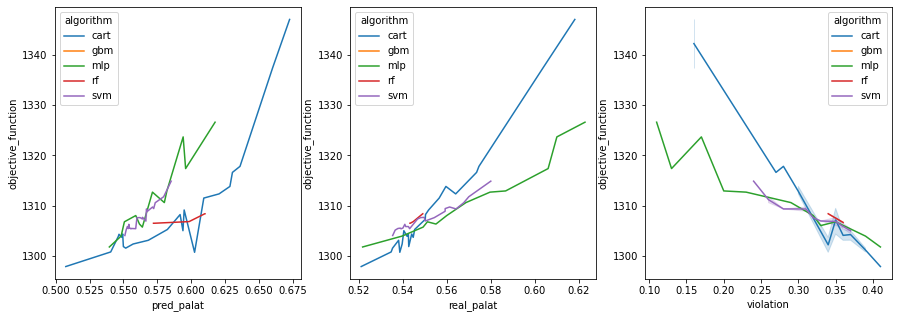

In [30]:
fig, axs = plt.subplots(ncols=3,nrows=1,figsize=(15,5))

summ_plot = summ.query('algorithm != "linear"')

# sol_plot = summ

sns.lineplot(data = summ_plot, 
             x = 'pred_palat', y = 'objective_function', hue = 'algorithm', ax=axs[0])
sns.lineplot(data = summ_plot, 
             x = 'real_palat', y = 'objective_function', hue = 'algorithm', ax=axs[1])
sns.lineplot(data = summ_plot, 
             x = 'violation', y = 'objective_function', hue = 'algorithm', ax=axs[2])

plt.savefig('figures/all_pareto.pdf')

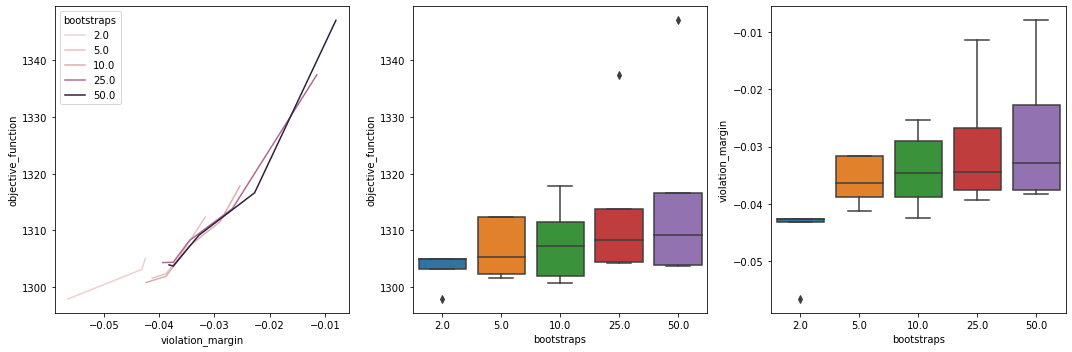

In [28]:
alg_plot = 'cart'

bs_plot = summ_plot.query('algorithm == "%s" & bootstraps > 0' % alg_plot).reset_index()

fig, axs = plt.subplots(ncols=3, nrows=1, figsize = (15,5))

sns.lineplot(data = bs_plot, 
             x = 'violation_margin', y = 'objective_function', hue = 'bootstraps',ax=axs[0])
sns.boxplot(data = bs_plot, 
             x = 'bootstraps', y = 'objective_function', ax=axs[1])
sns.boxplot(data = bs_plot, 
             x = 'bootstraps', y = 'violation_margin', ax=axs[2])

fig.tight_layout()

plt.savefig('figures/cart_effect_of_bootstraps.pdf')

In [9]:
# fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(15,5))

# sns.scatterplot(data = df_sols.query('algorithm == "cart" & iteration < 5'), 
#              x = 'pred_palat', y = 'objective_function', hue = 'iteration', ax=axs[0])
# sns.scatterplot(data = df_sols.query('algorithm == "linear"'), 
#              x = 'real_palat', y = 'objective_function', hue = 'algorithm', ax=axs[1])

## Takeaway 2: as the violation allowance increases, objective function improves (marginally) and % trials violating constraint increases (sometimes significantly) 

In [10]:
sol_plot = df_sols.query('algorithm != "linear" & bootstraps == 10')

<AxesSubplot:xlabel='viol_rule', ylabel='violation'>

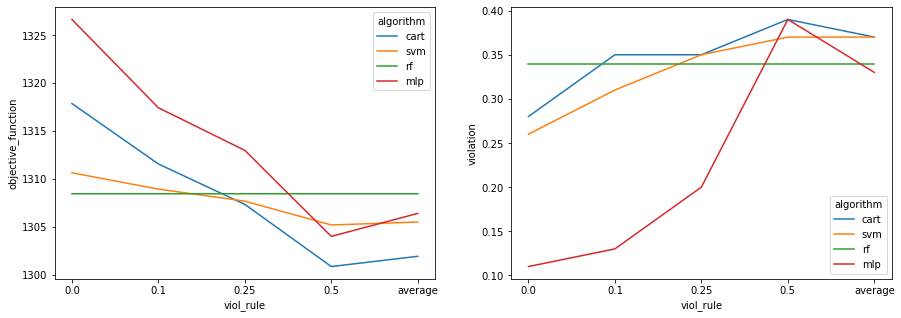

In [11]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(15,5))

sns.lineplot(data = sol_plot, x = 'viol_rule', y = 'objective_function', hue = 'algorithm', 
             ci = None,
             ax=axs[0])
sns.lineplot(data = sol_plot, x = 'viol_rule', y = 'violation', hue = 'algorithm', 
             ci = None,
             ax=axs[1])

## Takeaway 3: stricter violation limit leads to a lower margin of violation (both overall and adjusted to only violating cases)

<AxesSubplot:xlabel='viol_rule', ylabel='violation_margin_sub'>

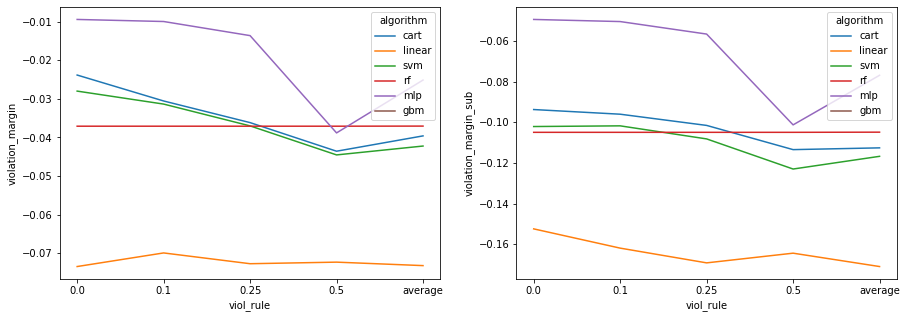

In [12]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(15,5))

sns.lineplot(data = df_sols, x = 'viol_rule', y = 'violation_margin', hue = 'algorithm', 
             ci = None,
             ax=axs[0])
sns.lineplot(data = df_sols, x = 'viol_rule', y = 'violation_margin_sub', hue = 'algorithm', 
             ci = None,
             ax=axs[1])

## Takeaway 4: Runtime [TBD]

In [13]:
summ.reset_index().query?

Object `query` not found.


In [16]:
summ.reset_index()

,algorithm,bootstraps,viol_rule,objective_function,real_palat,pred_palat,violation,violation_margin,violation_margin_sub,time
0,cart,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cart,0.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cart,0.0,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cart,0.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cart,0.0,average,1300.767448,0.538707,0.602552,0.34,-0.041904,-0.123246,0.707918
...,...,...,...,...,...,...,...,...,...,...
175,svm,50.0,0.0,1314.900450,0.580046,0.585263,0.24,-0.021096,-0.087899,0.463449
176,svm,50.0,0.1,1309.766875,0.561328,0.571544,0.31,-0.029395,-0.094823,1.607061
177,svm,50.0,0.25,1307.710043,0.549818,0.564091,0.35,-0.037124,-0.106069,1.736454
178,svm,50.0,0.5,1305.569562,0.538976,0.554389,0.36,-0.043837,-0.121768,2.232588


In [27]:
summ.reset_index().query('viol_rule == "0.1"').\
    pivot_table(index = 'algorithm', columns = 'bootstraps', values = 'time').round(2).to_clipboard()

<AxesSubplot:xlabel='bootstraps', ylabel='time'>

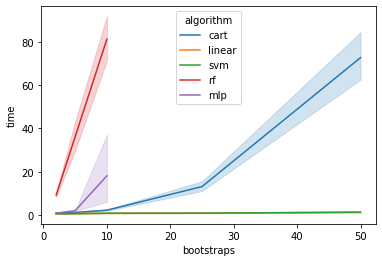

In [161]:
sns.lineplot(data = df_sols, x = 'bootstraps', y = 'time', hue = 'algorithm')

## Questions
- how many iterations? (100)
- bootstrap sample depends on # of bootstraps? experiment on bootstrap sample?
- linear case? -> explain poor performance as result of poor AUC

## Single model deep dive

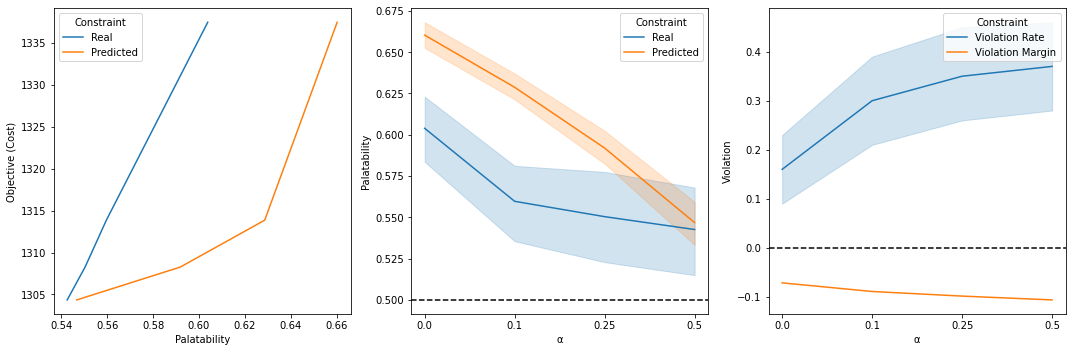

In [33]:
df_cart = df_sols.query('algorithm == "cart" & bootstraps == 25 & viol_rule != "average"').\
    rename(columns={'real_palat':'Real','pred_palat':'Predicted',
           'violation':'Violation Rate', 
#             'violation_margin':'Violation Margin (All)', 
            'violation_margin_sub':'Violation Margin',
                   'objective_function':'Objective (Cost)',
                   'viol_rule':'α'})

df_cart_long = df_cart.loc[:,['α','iteration',
                              'Real','Predicted',
#                               'violation',
#                               'violation_margin'
                             ]].\
    melt(id_vars = ['α','iteration']).\
    rename(columns={'variable':'Constraint', 'value':'Palatability'})

df_cart_long_v2 = df_cart.loc[:,['α','iteration',
#                               'real_palat',
#                                 'pred_palat',
                              'Violation Rate',
#                               'violation_margin',
                                 'Violation Margin'
                             ]].\
    melt(id_vars = ['α','iteration']).\
    rename(columns={'variable':'Constraint', 'value':'Violation'})

pareto_plot = df_cart.groupby('α')[['Real','Predicted','Objective (Cost)']].mean().\
    melt(id_vars = 'Objective (Cost)').\
    rename(columns={'variable':'Constraint', 'value':'Palatability'})
 
fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, nrows = 1, figsize = (15,5))

sns.lineplot(data=pareto_plot, x = 'Palatability', y = 'Objective (Cost)', hue = 'Constraint',
             ax=ax0).set_xlabel('Palatability');

# l2 = sns.lineplot(data=df_cart.groupby('viol_rule')[['real_palat','objective_function']].mean(), 
#                                                x = 'real_palat', y = 'objective_function', ax=ax0);
# ax0.legend([l1, l2],["HHZ 1", "HHN", "HHE"])


sns.lineplot(data = df_cart_long, x = 'α', y = 'Palatability', hue = 'Constraint', ax=ax1)
ax1.axhline(0.5, color='k',ls='--')

sns.lineplot(data = df_cart_long_v2, x = 'α', y = 'Violation', hue = 'Constraint', ax=ax2)
ax2.axhline(0, color='k',ls='--')

# sns.lineplot(data=df_cart, x = 'viol_rule', y = 'objective_function', ax=ax0);
# ax0.set_ylim([1200,1500])

fig.tight_layout()

plt.savefig('figures/cart_bs_25_comparison.pdf')

In [34]:
df_cart.groupby('α')[['Real','Predicted','Objective (Cost)']].mean()

,Real,Predicted,Objective (Cost)
α,,,
0.0,0.603810,0.660182,1337.431250
0.1,0.559652,0.628629,1313.852478
0.25,0.550372,0.591858,1308.263266
0.5,0.542590,0.546754,1304.350395
average,NaN,NaN,NaN


In [38]:
# (0.603810-0.542590)/0.542590
# (0.660182-0.546754)/0.546754
(1337.431250-1304.350395)/1304.350395

0.025361938882994824

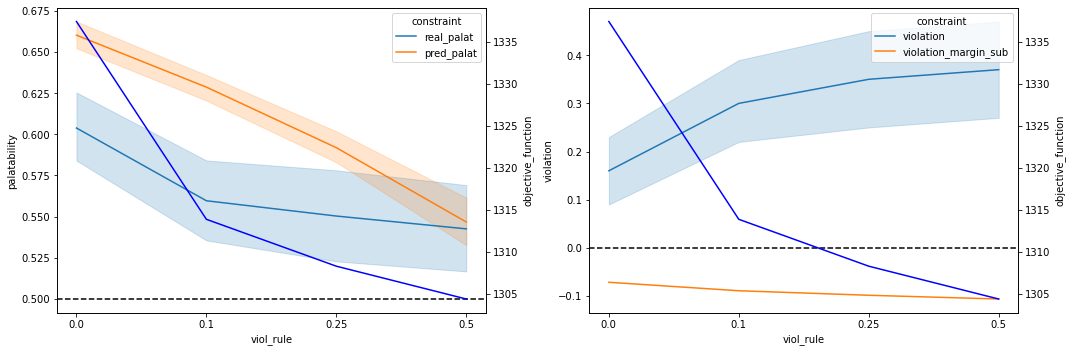

In [26]:
df_cart = df_sols.query('algorithm == "cart" & bootstraps == 25 & viol_rule != "average"')

df_cart_long = df_cart.loc[:,['viol_rule','iteration',
                              'real_palat','pred_palat',
#                               'violation',
#                               'violation_margin'
                             ]].\
    melt(id_vars = ['viol_rule','iteration']).\
    rename(columns={'variable':'constraint', 'value':'palatability'})

df_cart_long_v2 = df_cart.loc[:,['viol_rule','iteration',
#                               'real_palat',
#                                 'pred_palat',
                              'violation',
#                               'violation_margin',
                                 'violation_margin_sub'
                             ]].\
    melt(id_vars = ['viol_rule','iteration']).\
    rename(columns={'variable':'constraint', 'value':'violation'})
 
fig, (ax0, ax1) = plt.subplots(ncols = 2, nrows = 1, figsize = (15,5))
ax0_twin = ax0.twinx()
sns.lineplot(data = df_cart_long, x = 'viol_rule', y = 'palatability', hue = 'constraint', ax=ax0)
sns.lineplot(data=df_cart, x = 'viol_rule', y = 'objective_function',
             color='b', ci = None, ax=ax0_twin);
ax0.axhline(0.5, color='k',ls='--')

ax1_twin = ax1.twinx()
sns.lineplot(data = df_cart_long_v2, x = 'viol_rule', y = 'violation', hue = 'constraint', ax=ax1)
ax1.axhline(0, color='k',ls='--')
sns.lineplot(data=df_cart, x = 'viol_rule', y = 'objective_function',
             color='b', ci = None, ax=ax1_twin);

fig.tight_layout()



<AxesSubplot:xlabel='real_palat', ylabel='objective_function'>

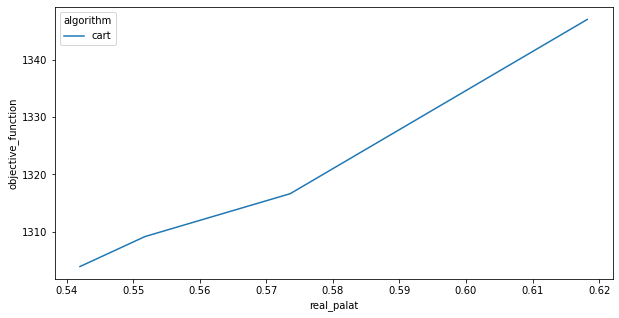

In [243]:
fig, axs = plt.subplots(ncols=1,nrows=1,figsize=(10,5))

summ_plot = summ.query('algorithm == "cart" & viol_rule != "average" & bootstraps == 50')
avg_vals = summ.query('algorithm == "cart" & viol_rule == "average" & bootstraps == 50').iloc[0,:]

# summ.query('algorithm == "cart" & viol_rule == "average" & bootstraps = 50')

x_col = 'real_palat'
sns.lineplot(data = summ.query('algorithm == "cart" & bootstraps == 50'), 
             x = x_col, y = 'objective_function', hue = 'algorithm', ax=axs)
# sns.regplot(x=np.array([avg_vals[x_col]]), 
#             y=np.array([avg_vals['objective_function']]), 
#             scatter=True, fit_reg=False, marker='o',
#             scatter_kws={"s": 100})  

In [212]:
df_cart.loc[df_cart['viol_rule'].isin(["average","0.5"]),['iteration','real_palat','pred_palat']].sort_values('iteration')

,iteration,real_palat,pred_palat
2000,0,0.641110,0.566481
2400,0,0.641110,0.566481
2001,1,0.628967,0.505375
2401,1,0.628967,0.505375
2002,2,0.389084,0.500379
...,...,...,...
2097,97,0.398841,0.502230
2498,98,0.316736,0.482952
2098,98,0.322762,0.503486
2099,99,0.639888,0.503748


In [ ]:
df_plot.query